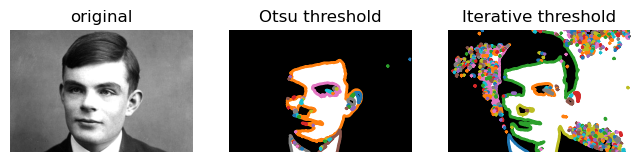

Otsu threshold: threshold = 0.658203125
Iterative threshold: threshold = 0.5013251341670902
Otsu threshold: foreground mean = 0.89, background mean = 0.43, foreground variance = 0.01, background variance = 0.02
Iterative threshold: foreground mean = 0.66, background mean = 0.35, foreground variance = 0.03, background variance = 0.02


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from scipy import ndimage as ndi
from skimage import filters, segmentation, measure

# 读取图像
img = io.imread('D:/Game/upian/uling.png', as_gray=True)

# 大津法
threshold_otsu = filters.threshold_otsu(img)
img_binary_otsu = img > threshold_otsu

# 迭代法
threshold_iter = filters.threshold_mean(img)
img_binary_iter = img > threshold_iter

# 计算轮廓
contours_otsu = measure.find_contours(img_binary_otsu, 0.5)
contours_iter = measure.find_contours(img_binary_iter, 0.5)

# 绘制结果
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(8, 3))

ax1.imshow(img, cmap='gray')
ax1.set_title('original')

ax2.imshow(img_binary_otsu, cmap='gray')
ax2.set_title('Otsu threshold')

for n, contour in enumerate(contours_otsu):
    ax2.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax3.imshow(img_binary_iter, cmap='gray')
ax3.set_title('Iterative threshold')

for n, contour in enumerate(contours_iter):
    ax3.plot(contour[:, 1], contour[:, 0], linewidth=2)

for ax in fig.axes:
    ax.axis('off')

plt.show()

# 计算性能差异
print('Otsu threshold: threshold =', threshold_otsu)
print('Iterative threshold: threshold =', threshold_iter)

img_fg_otsu = img[img_binary_otsu]
img_bg_otsu = img[~img_binary_otsu]
img_fg_iter = img[img_binary_iter]
img_bg_iter = img[~img_binary_iter]

otsu_fg_mean = img_fg_otsu.mean()
otsu_bg_mean = img_bg_otsu.mean()
iter_fg_mean = img_fg_iter.mean()
iter_bg_mean = img_bg_iter.mean()

otsu_fg_var = img_fg_otsu.var()
otsu_bg_var = img_bg_otsu.var()
iter_fg_var = img_fg_iter.var()
iter_bg_var = img_bg_iter.var()

print('Otsu threshold: foreground mean = {:.2f}, background mean = {:.2f}, foreground variance = {:.2f}, background variance = {:.2f}'.format(otsu_fg_mean, otsu_bg_mean, otsu_fg_var, otsu_bg_var))
print('Iterative threshold: foreground mean = {:.2f}, background mean = {:.2f}, foreground variance = {:.2f}, background variance = {:.2f}'.format(iter_fg_mean, iter_bg_mean, iter_fg_var, iter_bg_var))